In [1]:
import sys
import os

# Add upper directory
current_dir = os.path.dirname(os.path.abspath('demo_vad_pitch.ipynb'))
upper_dir = (os.path.join(current_dir, '..'))
sys.path.append(upper_dir)

from utils_global import draw_spec, audioshow, extract_frames
import librosa
from IPython.display import Audio, display
import numpy as np
from matplotlib import pyplot as plt

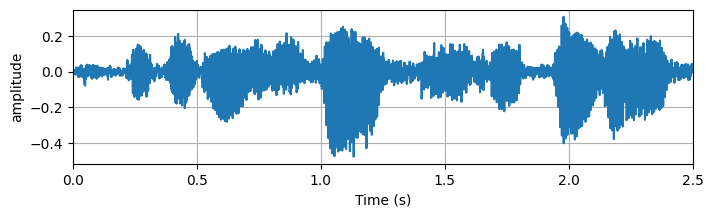

In [2]:
""" Voice Activity Detection """

y, sr = librosa.load("./sample_crop_16kHz.wav")
audioshow(y,sr)
display(Audio(y, rate=sr))

# Extract Frames

In [3]:
from ste_zcr import ste, zcr, vad, plot_ste_zcr_vad

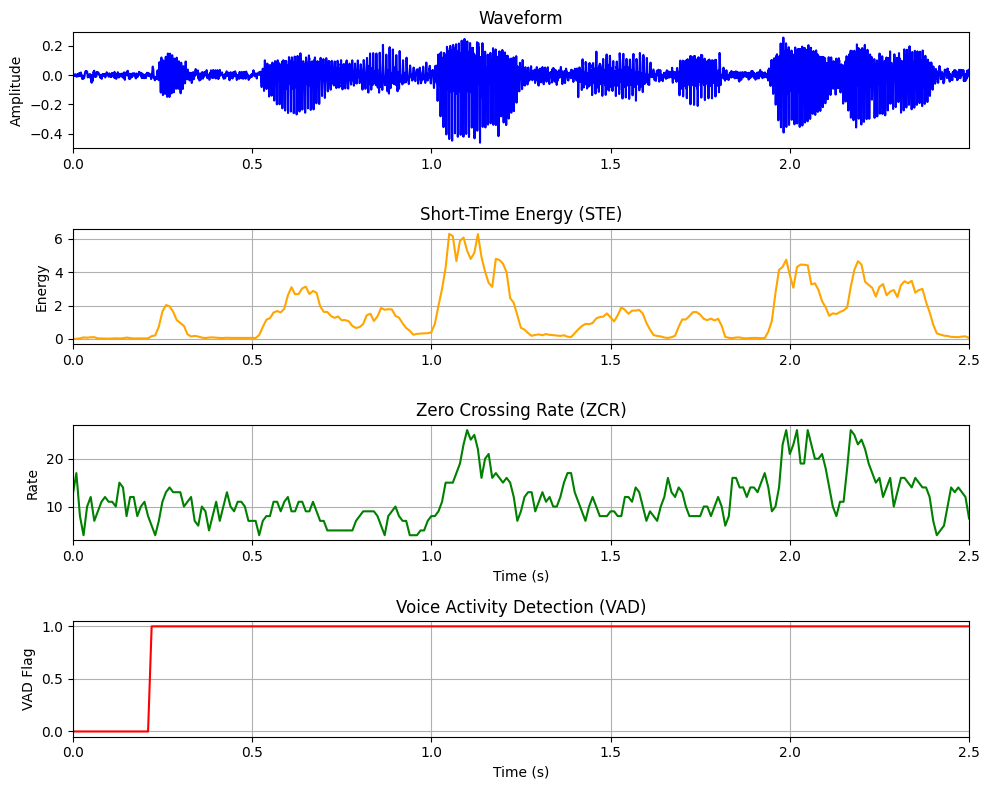

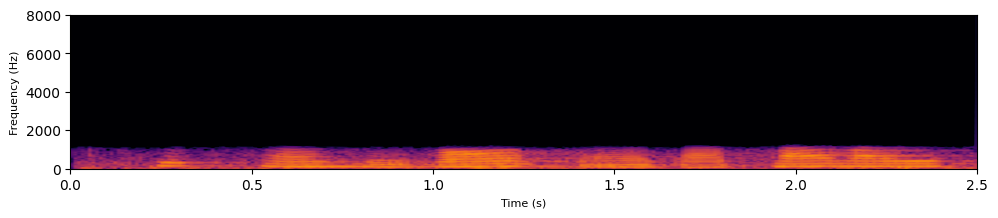

251


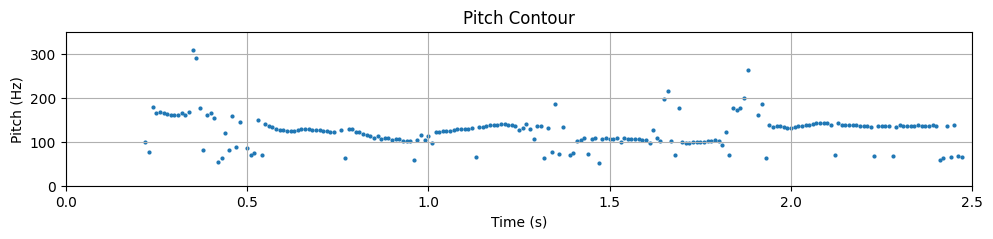

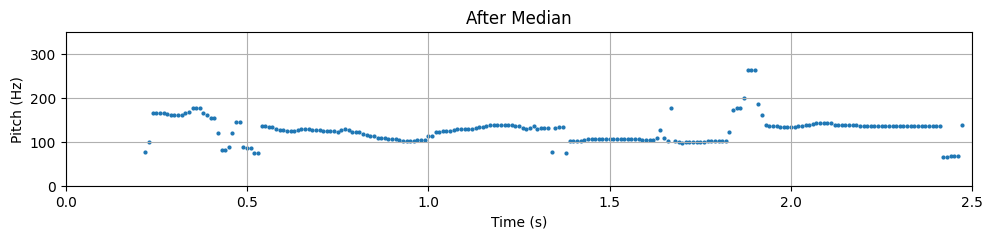

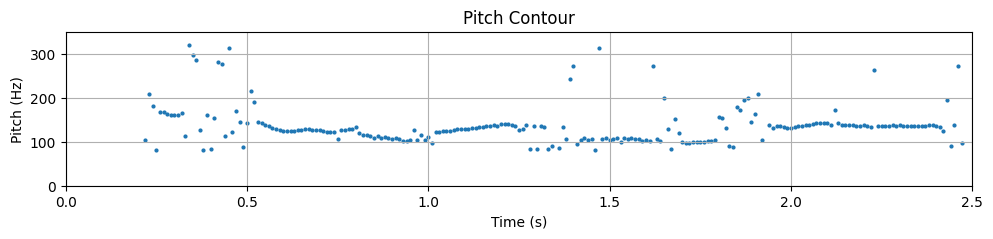

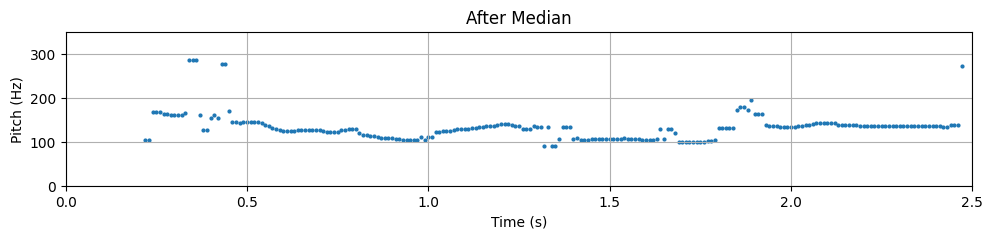

251


In [5]:
from scipy.signal import medfilt
from pitchestimate import pitch_estimate_ac, pitch_estimate_amdf, plot_pitch_contour

### Usage 
# y, sr = librosa.load("./p232_011.wav", sr=None)
y, sr = librosa.load("./sample_crop_16kHz.wav", sr=None)
# y, sr = librosa.load("./s5_001_mic1.flac")
# y, sr = librosa.load("./s5_180_mic1.flac")

from utils_global import lpf
y = lpf(y, cutoff=1000)

frames = extract_frames(y, sr=sr, win_type='rectangular', win_length=320, hop_length=160)

ste_arr = ste(frames)
zcr_arr = zcr(frames)
vad_arr = vad(ste_arr, frame_duration=15)

plot_ste_zcr_vad(y, ste_arr, zcr_arr, vad_arr)
t=draw_spec(y, sr=sr, win_len=320, hop_len=160, use_colorbar=False, figsize=(11.7,2))
display(Audio(y, rate=sr))

print(len(ste_arr))
 
 ### Pitch using AutoCorrelation
pitches = pitch_estimate_ac(y, sr=16000, vad_arr=vad_arr,  win_type='rectangular', win_length=320, hop_length=160, clip=True)
plot_pitch_contour(pitches, sr=16000, hop_length=160, figsize=(11.7,2))
pitches = medfilt(pitches, kernel_size=5) 
plot_pitch_contour(pitches, sr=16000,hop_length=160, figsize=(11.7,2), title='After Median')

pitches = pitch_estimate_amdf(y, sr=16000, vad_arr=vad_arr,  win_type='rectangular', win_length=320, hop_length=160, max_lag=200, plot_amdf=False)
plot_pitch_contour(pitches, sr=16000, hop_length=160, figsize=(11.7,2))
pitches = medfilt(pitches, kernel_size=5) 
plot_pitch_contour(pitches, sr=16000,hop_length=160, figsize=(11.7,2), title='After Median')

print(len(pitches))